## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df=pd.read_csv(mouse_metadata_path)
study_results_df=pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mousedata=pd.merge(mouse_metadata_df, study_results_df, how ='left', on ='Mouse ID')  

# Display the data table for preview
merged_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#output to excel to check the records-(for self)
merged_mousedata.to_excel(r"data\merged_mousedata.xlsx", index = False)

In [3]:
# Check the number of mice.
mice_no=len(merged_mousedata['Mouse ID'].unique())
print(mice_no)

249


In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints.

#Outputs duplicate mouse IDs.
duplicate_mouse_ids = merged_mousedata.loc[merged_mousedata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ids)

duplicate_mouse_data = merged_mousedata.loc[merged_mousedata['Mouse ID']=="g989"]
duplicate_mouse_data
                                            
#Outputs rows with duplicate timepoints.
#duplicate_mousedata=merged_mousedata.loc[merged_mousedata["Mouse ID"]=="g989"]
#duplicate_mousedata

['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Drop any duplicate rows
#cleaned_mousedata=merged_mousedata[merged_mousedata["Mouse ID"].isin(duplicate_mouse_data)==False]
#cleaned_mousedata
cleaned_mousedata=merged_mousedata.drop_duplicates(["Mouse ID", "Timepoint"], keep=False)
cleaned_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Recheck the number of mice -need to revisit!
mice_no=len(cleaned_mousedata['Mouse ID'].unique())
print(mice_no)

249


In [7]:
#output to excel to check the records-(for self)
cleaned_mousedata.to_excel(r"data\Cleaned_mousedata.xlsx", index = False)

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
grouped_stats=cleaned_mousedata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std', 'sem']}).reset_index()
print(grouped_stats)

  Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.458254  50.854632  44.053659  6.637293  0.540135
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Mouse ID')

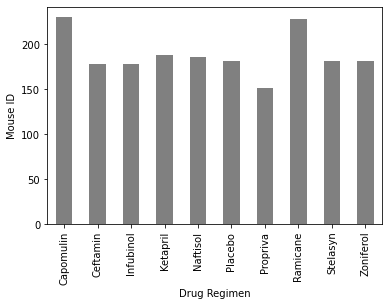

In [9]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
mice_dr=cleaned_mousedata.groupby('Drug Regimen')
mice_count=mice_dr["Mouse ID"].count()
mice_count

bar_chart1=mice_count.plot.bar(x='Drug Regimen', y='Mouse ID', color='grey')
bar_chart1.set_xlabel('Drug Regimen')
bar_chart1.set_ylabel('Mouse ID')

<BarContainer object of 10 artists>

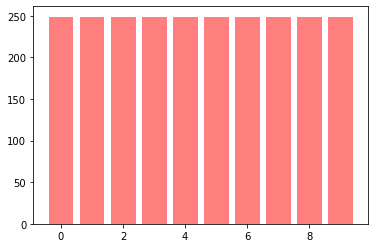

In [10]:
# Generate identical bar plot using pyplot instead of pandas.
drug_count=cleaned_mousedata["Drug Regimen"].nunique()
#print(drug_count)
mouse_count=cleaned_mousedata["Mouse ID"].nunique()
#print(mouse_count)

# Set x axis and tick locations
x_axis=np.arange(drug_count)
#tick_locations=[value for value in x_axis]
#tick_locations=["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"]

#plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_count, color="r", alpha=0.5,align="center")
#plt.xticks(tick_locations, mouse_count["Mouse ID"], rotation="vertical")

#plt.title("Mouse data per drug regimen")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Mouse ID")

#Create legend for chart
#plt.legend(handles=[danger_drop, railgun], loc="best")

#plt.show()

#plt.title("Mouse data per drug regimen")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Mouse ID")

#set limits for x and y axes
#plt.xlim(0,120)
#plt.ylim(5,95)

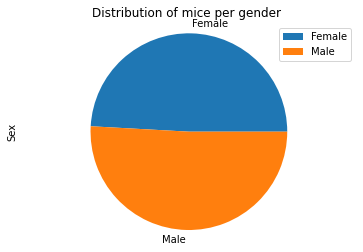

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Grouped the cleaned dataframe by gender
grouped_gender=cleaned_mousedata.groupby('Sex')

#Generated count for each gender as we need to pass a single parameter instead of array to plot
gender_count=grouped_gender['Sex'].count()
gender_count

#Create a plot using dataframe.plot
gender_chart=gender_count.plot(kind='pie', y='Sex',title=("Distribution of mice per gender "))
plt.legend(loc="best")
plt.axis("equal")
plt.show()

In [12]:
#Delete this later-for self reference
gender_count

Sex
Female    925
Male      958
Name: Sex, dtype: int64

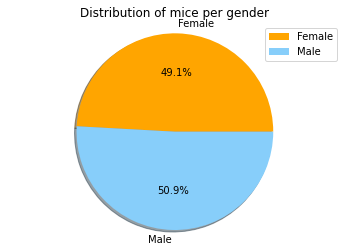

In [13]:
# Generate identical pie plot using pyplot

#Defining datasets
gender = ["Female", "Male"]
colors = ["orange", "lightskyblue"]

#Generating the plot
plt.title("Distribution of mice per gender")
plt.pie(gender_count, explode=None, labels=gender, colors=colors,autopct="%1.1f%%", shadow=True, startangle=360)
plt.legend(loc="best")
plt.axis("equal")
plt.show()

# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
#plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

only_Capomulin=cleaned_mousedata.loc[cleaned_mousedata['Drug Regimen']=='Capomulin']
#print(only_Capomulin)
#Capomulin_sort=cleaned_mousedata.sort_values('Timepoint')
                                     
only_Ramicane=cleaned_mousedata.loc[cleaned_mousedata['Drug Regimen']=='Ramicane']
#print(only_Ramicane)

only_Infubinol=cleaned_mousedata.loc[cleaned_mousedata['Drug Regimen']=='Infubinol']
#print(only_Infubinol)
only_Ceftamin=cleaned_mousedata.loc[cleaned_mousedata['Drug Regimen']=='Ceftamin']
#print(only_Ceftamin)

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
row_list=[]

for index, rows in only_Capomulin.iterrows():
    my_list=[rows.Timepoint]
    row_list.append(my_list)
print(row_list)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


[[0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [15], [20], [25], [30], [35], [0], [5], [10], [15], [20], [25], [30], [35], [40], [45], [0], [5], [10], [0], [5], [10], [15], [20], [25], [30],

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [15]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

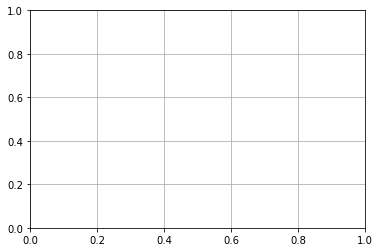

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

#Create a df with mouse ID = s185 & Drug Regimen=Capomulin
#Get the values for timepoint and tumor volume


# Create the X and Y axis lists
#mouse_ID = np.arange(0,10)

#timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
#tumor_volume = [45, 30, 30, 25, 40, 45, 30, 20, 40, 40, 35, 35, 30]

# Plot the charts and apply some styling
#tumorplot, = plt.plot(timepoint, tumor_volume, color="blue")

# Add labels to X and Y axes :: Add title
#plt.title("Tumor Volume Over Timepoint")
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume")

# Set the limits for the X and Y axes
#plt.xlim(0,50)
#plt.ylim(10,60)

# Create a legend for the chart
#plt.legend(handles=[timepoint, tumor_volume], loc="best")

# Add in a grid for the chart
plt.grid()

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

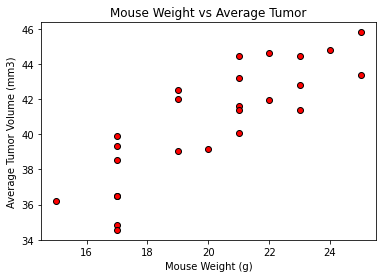

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

#Create a df of all mice with Capomulin
cap_mice=merged_mousedata[(merged_mousedata['Drug Regimen']=="Capomulin")]
#print(cap_mice)

#groupby mice ID & calculate avg. tumor volume & mouse weight
avg_tumor=cap_mice.groupby("Mouse ID").agg({'Tumor Volume (mm3)':['mean']})
#print(avg_tumor)

mouse_weight=cap_mice.groupby("Mouse ID").agg({'Weight (g)':['mean']})
#print(mouse_weight)

# Tell matplotlib to create a scatter plot - x and y parameters in scatter plot are array-like for which i used numpy .agg
plt.scatter(cap_mice.groupby("Mouse ID").agg({'Weight (g)':['mean']}),cap_mice.groupby("Mouse ID").agg({'Tumor Volume (mm3)':['mean']}), marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
#plt.ylim(180,620)

# Set the upper and lower limits of our x axis
#plt.xlim(11,26)

# Title, x label, and y label for chart
plt.title("Mouse Weight vs Average Tumor")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights